ML Major functions

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import pdb
from mpl_toolkits.mplot3d import axes3d


LS Method
(X_transpose * X_Vector) inv X_tranpose * Y_vector

In [9]:
# Augmented the last coloumn with 1
X_vector = np.array([[1,2,1],[2,1,1],[1,3,1],[3,2,1],[3,1.5,1],[2.5,3,1]])
# Taken as values in class 1 as 1 and class 2 as -1
Y_vector = np.array([[1],[1],[1],[-1],[-1],[-1]])

X_tranpose_X = X_vector.transpose().dot(X_vector)

theta = np.linalg.inv(X_tranpose_X).dot(X_vector.transpose()).dot(Y_vector)
theta

array([[-1.20469799],
       [-0.54697987],
       [ 3.64932886]])

LMS Method

In [74]:
theta_1 = np.array([[1],[1],[1]])
theta = 0.5
theta_Vector = np.zeros((3,16))
theta_Vector[0][0] = 1
theta_Vector[1][0] = 1
theta_Vector[2][0] = 1
X_vector = np.array([[1,2,1],[2,0,1],[3,1,1],[2,3,1]])
Y_vector = np.array([[1],[1],[-1],[-1]])
mu = 0.5
k=-1
prev_K_val = -1
flag = False
odd = False
for i in range(0,16):
    mu_i = mu/(i+1)
    
    while True:
        k = (k+1)%4
        
        val = mu_i * ((Y_vector[k] - theta_Vector[:,i].transpose().dot(X_vector[k])) * (X_vector[k]))
        val_1 = np.sqrt(val.transpose().dot(val))
        if val_1 > theta:
            
            #Y_vector[i] = Y_vector[k]
            #X_vector[i] = X_vector[k]
            #print("X_Vector : ",X_vector)
            theta_Vector[:,i+1] = theta_Vector[:,i] + mu_i * ((Y_vector[k] - theta_Vector[:,i].transpose().dot(X_vector[k])) * (X_vector[k]))
            print("I : ",i+1)
            print("K : ",k+1)
            print("Theta :",theta_Vector[:,i])
            print("Mu :",mu)
            print("Val 1 : ",val_1)
            print("Val : ",val)
            print("=========================================")

            # Code to check if converged ?
            if odd == True:
                if prev_K_val == k+1:
                    flag = True
                prev_K_val = k +1
                odd = False
            else:
                odd = True
            break

    if flag == True:
        break


I :  1
K :  1
Theta : [1. 1. 1.]
Mu : 0.5
Val 1 :  3.6742346141747673
Val :  [-1.5 -3.  -1.5]
I :  2
K :  2
Theta : [-0.5 -2.  -0.5]
Mu : 0.5
Val 1 :  1.3975424859373686
Val :  [1.25  0.    0.625]
I :  3
K :  3
Theta : [ 0.75  -2.     0.125]
Mu : 0.5
Val 1 :  0.7600598477897792
Val :  [-0.6875     -0.22916667 -0.22916667]
I :  4
K :  4
Theta : [ 0.0625     -2.22916667 -0.10416667]
Mu : 0.5
Val 1 :  2.650340648964875
Val :  [1.41666667 2.125      0.70833333]
I :  5
K :  2
Theta : [ 1.47916667 -0.10416667  0.60416667]
Mu : 0.5
Val 1 :  0.5729924192343212
Val :  [-0.5125  -0.      -0.25625]
I :  6
K :  3
Theta : [ 0.96666667 -0.10416667  0.34791667]
Mu : 0.5
Val 1 :  1.145271997919599
Val :  [-1.0359375 -0.3453125 -0.3453125]


KeyboardInterrupt: 

Batch Perceptron

In [81]:
theta = np.array([[0,0]])
learning_rate = 1
X_Vector = np.array([[-3,-2],[1,-1],[4,1]])
mis_classified_samples = np.array(np.shape((3,2)))
mis_classified_samples = X_Vector
for i in range(0,10):
    print("======================")
    if mis_classified_samples.ndim == 1:
        sum_of_misclassified_sample = mis_classified_samples 
    else:
        sum_of_misclassified_sample = np.sum(mis_classified_samples,axis=0)
    
    print("Theta ",i)
    print(theta[i])
    new_Theta = theta[i] + learning_rate * sum_of_misclassified_sample
    theta = np.append(theta,np.array([new_Theta]),axis=0)
    new_mis_cls_samples = np.zeros((3,2))
    mis_count = 0
    for m in X_Vector:
        print(new_Theta.dot(m))
        if new_Theta.dot(m) <= 0 :
            new_mis_cls_samples[mis_count] = m
            mis_count = mis_count+1
    
    if mis_count == 0:
        print("All Done")
        break
    
    print("Newly mis classified samples")
    mis_classified_samples = new_mis_cls_samples
    print(mis_classified_samples)
    print("============================================")
    
print("Total Theta")
print(theta)
    
    

Theta  0
[0 0]
-2
4
6
Newly mis classified samples
[[-3. -2.]
 [ 0.  0.]
 [ 0.  0.]]
Theta  1
[ 2 -2]
11.0
3.0
-8.0
Newly mis classified samples
[[4. 1.]
 [0. 0.]
 [0. 0.]]
Theta  2
[-1. -4.]
-3.0
6.0
9.0
Newly mis classified samples
[[-3. -2.]
 [ 0.  0.]
 [ 0.  0.]]
Theta  3
[ 3. -3.]
10.0
5.0
-5.0
Newly mis classified samples
[[4. 1.]
 [0. 0.]
 [0. 0.]]
Theta  4
[ 0. -5.]
-4.0
8.0
12.0
Newly mis classified samples
[[-3. -2.]
 [ 0.  0.]
 [ 0.  0.]]
Theta  5
[ 4. -4.]
9.0
7.0
-2.0
Newly mis classified samples
[[4. 1.]
 [0. 0.]
 [0. 0.]]
Theta  6
[ 1. -6.]
-5.0
10.0
15.0
Newly mis classified samples
[[-3. -2.]
 [ 0.  0.]
 [ 0.  0.]]
Theta  7
[ 5. -5.]
8.0
9.0
1.0
All Done
Total Theta
[[ 0.  0.]
 [ 2. -2.]
 [-1. -4.]
 [ 3. -3.]
 [ 0. -5.]
 [ 4. -4.]
 [ 1. -6.]
 [ 5. -5.]
 [ 2. -7.]]


In [19]:
def norm2D(my,Sgm,x1,x2):
    X1,X2 = np.meshgrid(x1,x2)
    [n,d]=np.shape(X1)
    p = np.zeros(np.shape(X1))
    l,k = np.shape(Sgm)
    for i in np.arange(0, n):
        for j in np.arange(0, d):
            x = np.array([[X1[i,j]],[X2[i,j]]])
            p[i,j] = (1 / (((2 * np.pi)**(l/2)) * np.sqrt(np.linalg.det(Sgm))) * \
                np.exp((-1/2)*np.matmul(((x-my).transpose()),np.matmul((np.linalg.inv(Sgm)),(x-my)))))

    return p

In [32]:
def classplot(g, x1, x2, gnan=0, discr='', gsv={'gsv':0, 'figstr':'fig_'}):

    if discr == 'pxw':
        zlb = '$p(\mathbf{x}|\omega_i)$'
    elif discr == 'Pwpxw':
        zlb = '$P(\omega_i)p(\mathbf{x}|\omega_i)$'
    elif discr == 'Pwx':
        zlb = '$P(\omega_i | \mathbf{x})$'
    else:
        zlb = ''

    eps = sys.float_info.epsilon
    X1, X2 = np.meshgrid(x1, x2)
    M = len(g)
    col = ['r', 'b', 'g', 'y', 'k']
    fig = plt.figure(1,figsize=[5,5])
    fig.set_facecolor('gray')
    #ax = fig.gca(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    obj = []
    mx = []
    for i in range(0, M):
        if gnan == 0:
            G = g[i]
        else:
            G = np.copy(g[i]) + 0 * 1e100 * eps
            NN = (G < np.amax(g, axis=0)) * 1
            NN = NN.astype(float)
            G = np.copy(g[i])
            np.putmask(G, NN == 1, np.nan)
        obj = ax.plot_surface(X1, X2, G, facecolor=col[i])
        mx.append(g[i].max())
    zm = np.around(1.2 * max(mx), decimals=2)
    xt = (np.linspace(x1[0, 0], x1[-1, 0], 5))
    yt = (np.linspace(x2[0, 0], x2[-1, 0], 5))
    zt = (np.linspace(0, zm, 4))
    zt = np.around(zt, decimals=3)
    ax.set(xticks=xt, yticks=yt, zticks=zt)
    ax.set(xlim=(x1[0, 0], x1[-1, 0]), ylim=(x2[0, 0], x2[-1, 0]))
    ax.set(xlabel='$x_1$', ylabel='$x_2$', zlabel=zlb)
    if gsv['gsv']:
        plt.savefig(gsv['figstr'] + discr + '.png')

    plt.show()

In [33]:
def test2(bigTheta,thetaI,thetaI0,x1,x2):
    X1,X2 = np.meshgrid(x1,x2)
    [a,b] = np.shape(X1)
    pN = np.array(np.zeros((a,b)))
    for i in range(a):
        for j in range(b):
            x = np.array([[X1[i,j]] , [X2[i,j]]])
            pN[i,j] = np.matmul(np.matmul(x.transpose(),bigTheta),x) + np.matmul(thetaI.transpose(),x) + thetaI0
    return pN


In [36]:
def labsol2(discr='pxw'):
    
    x1=np.arange(-5,5.5,0.5).reshape(-1,1)
    x2=np.arange(-5,5.5,0.5).reshape(-1,1)
    
    # Problem 1 a
    print("******PROBLEM 1 A******")
    # Calculating the p(x|w1)
    myW1=np.array([[-1.5],[-1.5]])
    SgmW1=np.array([[0.5,0],[0,0.5]])
    myW2=np.array([[1.5],[1.5]])
    SgmW2=np.array([[1,0],[0,0.5]])
    myW3=np.array([[0],[0]])
    SgmW3=np.array([[0.5,0],[0,0.5]])
    pxW1=norm2D(myW1,SgmW1,x1,x2)
    
    #classplot(np.array([pxW1]),x1,x2,1)
    # Plotted w1 in blue colour
        
    # Problem 1 b
    print("******PROBLEM 1 B******")
    # Calculating the p(x|w2)
    #myW2=np.array([[3],[-2]])
    #SgmW2=np.array([[2,0],[0,2]])
    #pxW2=norm2D(myW2,SgmW2,x1,x2)
    
    pxW2=norm2D(myW2,SgmW2,x1,x2)
    pxW3=norm2D(myW3,SgmW3,x1,x2)

    classplot(np.array([pxW1,pxW2,pxW3]),x1,x2,1)
    # The orange colour represents the class 2 and the blue represents the class 1
    
    # Problem 1 c
    print("******PROBLEM 1 C******")
    # Calculating the P(w1)*p(x|w1)
    pW1pxW1 = pxW1*0.2
    
    # Calculating the P(w2)*p(x|w2)
    pW2pxW2 = pxW2*0.6
    
    pW3pxW3 = pxW3*0.2
    finalResult = np.array([pW1pxW1,pW2pxW2,pW3pxW3])
    #classplot(finalResult,x1,x2,1)
    # The orange colour represents the class 2 and the blue represents the class 1
    
    px = pW1pxW1 + pW2pxW2 + pW3pxW3

    pW1x = pW1pxW1 / px
    pW2x = pW2pxW2 / px
    pW3x = pW3pxW3 / px
    
    finalResult = np.array([pW1x,pW2x,pW3x])
    #classplot(finalResult,x1,x2,1)
    
    ## g(x) arbitrary
    
    bigTheta = -0.5 * np.linalg.inv(SgmW1)
    thetaI = np.matmul(np.linalg.inv(SgmW1) , myW1)
    thetaI0 = (np.matmul(np.matmul(-0.5 * myW1.transpose() , np.linalg.inv(SgmW1)) , myW1)) - (0.5 * np.log(np.linalg.det(SgmW1))) + (np.log(0.2))
    resultW1 = test2(bigTheta,thetaI,thetaI0,x1,x2)
    
    bigTheta = -0.5 * np.linalg.inv(SgmW2)
    thetaI = np.matmul(np.linalg.inv(SgmW2) , myW2)
    thetaI0 = (np.matmul(np.matmul(-0.5 * myW2.transpose() , np.linalg.inv(SgmW2)) , myW2)) - (0.5 * np.log(np.linalg.det(SgmW2))) + (np.log(0.6))
    resultW2 = test2(bigTheta,thetaI,thetaI0,x1,x2)
    
    
    bigTheta = -0.5 * np.linalg.inv(SgmW3)
    thetaI = np.matmul(np.linalg.inv(SgmW3) , myW3)
    thetaI0 = (np.matmul(np.matmul(-0.5 * myW3.transpose() , np.linalg.inv(SgmW3)) , myW3)) - (0.5 * np.log(np.linalg.det(SgmW3))) + (np.log(0.2))
    resultW3 = test2(bigTheta,thetaI,thetaI0,x1,x2)
    
    
    finalResult = np.array([resultW1,resultW2,resultW3])
    classplot(finalResult,x1,x2,1)
    
    # Problem 1 d
    print("******PROBLEM 1 D******")
    ## Comment on problem 1 d
    print("The decision boundary is shown in the figure which is actually a curve (non linear).\n"+
          "This boundary seperates the two classes and the rest of the portion is called the decision area.\n"+
          "The blue region is the decision area for class 1 and the orange region is the decision area \n"+
          "for class 2")
    
    # Problem 1 e
    print("******PROBLEM 1 E******")
    myW1=np.array([[3],[2]])
    SgmW1=np.array([[0.5,0],[0,2]])
    pxW1=norm2D(myW1,SgmW1,x1,x2)
    pW1pxW1 = pxW1*0.1

    myW2=np.array([[3],[1]])
    SgmW2=np.array([[2,0],[0,2]])
    pxW2=norm2D(myW2,SgmW2,x1,x2)
    pW2pxW2 = pxW2*0.9

    finalResult = np.array([pW1pxW1,pW2pxW2])
    classplot(finalResult,x1,x2,1)
    print("The decision boundary has changed.\n"+
    "It has come closer to the class 1 as class 2 has a larger prior probability.\n"+
    "The decision region of class 2 has decreased when the same has increased for class 1\n")
    ## The decision boundary has changed
    ## It has come closer to the class 1 as class 2 has a larger prior probability
    ## The decision region of class 2 has decreased when the same has increased for class 1
    
    # Problem 1 f
    print("******PROBLEM 1 F******")
    myW1=np.array([[3],[6]])
    SgmW1=np.array([[0.5,0],[0,2]])
    pxW1=norm2D(myW1,SgmW1,x1,x2)
    pW1pxW1 = pxW1*0.1

    myW2=np.array([[3],[-2]])
    SgmW2=np.array([[2,0],[0,2]])
    pxW2=norm2D(myW2,SgmW2,x1,x2)
    pW2pxW2 = pxW2*0.9
    px = pW1pxW1 + pW2pxW2

    pW1x = pW1pxW1 / px
    pW2x = pW2pxW2 / px

    finalResult = np.array([pW1x,pW2x])
    classplot(finalResult,x1,x2,0)
    print("As the probabilities have changed, the area for the ")
    

******PROBLEM 1 A******
******PROBLEM 1 B******


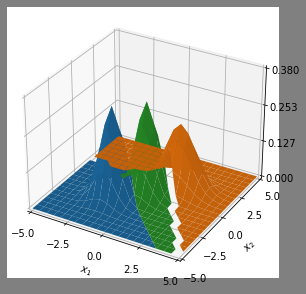

******PROBLEM 1 C******


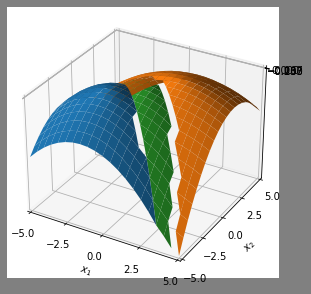

******PROBLEM 1 D******
The decision boundary is shown in the figure which is actually a curve (non linear).
This boundary seperates the two classes and the rest of the portion is called the decision area.
The blue region is the decision area for class 1 and the orange region is the decision area 
for class 2
******PROBLEM 1 E******


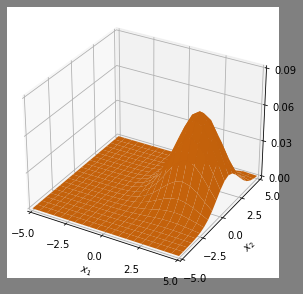

The decision boundary has changed.
It has come closer to the class 1 as class 2 has a larger prior probability.
The decision region of class 2 has decreased when the same has increased for class 1

******PROBLEM 1 F******


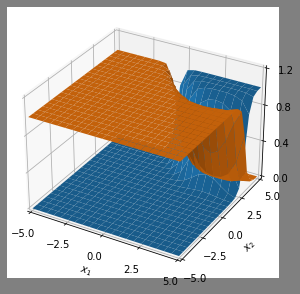

As the probabilities have changed, the area for the 


In [37]:
labsol2()